#**STROKE PREDICTION**

In [73]:
# IMPORT BASE LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

In [74]:
#IMPORT DATASET
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
display( df.head() )
print()
display( df.info() )
print()
display( df.describe(include='all') )

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [75]:
#listing duplicate rows
df.duplicated().sum()

0

In [76]:
#listing columns with missing data
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [77]:
#distribution of target
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#CLEANING DATA - (by column)

##(1)  ID column will be dropped.  It has no relation to stroke prediction.

In [78]:
df.drop(columns='id', inplace=True)

##(2) Gender

In [79]:
#quick view of data
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [80]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [81]:
#dropping row labled "Other"
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [82]:
df.drop(3116, inplace=True)

In [83]:
#confirming change
display( df.shape )
print()
df['gender'].value_counts()

(5109, 11)

Female    2994
Male      2115
Name: gender, dtype: int64

##(3) AGE

In [84]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [85]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [86]:
df['age'].describe()

count    5109.000000
mean       43.229986
std        22.613575
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [87]:
df[ (df['age']<1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [88]:
df[ (df['age']>=1) & (df['age']<2) ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
562,Female,1.80,0,0,No,children,Urban,58.26,16.5,Unknown,0
597,Female,1.08,0,0,No,children,Rural,60.53,17.5,Unknown,0
607,Female,1.80,0,0,No,children,Urban,102.34,17.0,Unknown,0
684,Female,1.80,0,0,No,children,Urban,130.61,14.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4860,Female,1.08,0,0,No,children,Urban,109.33,18.2,Unknown,0
4934,Male,1.32,0,0,No,children,Rural,107.02,NaN,Unknown,0
5032,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5079,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0


In [89]:
df[ (df['age']>=2) & (df['age']<3) ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
437,Female,2.0,0,0,No,children,Rural,92.48,18.0,Unknown,0
683,Female,2.0,0,0,No,children,Rural,79.89,31.6,Unknown,0
750,Male,2.0,0,0,No,children,Rural,73.62,20.8,Unknown,0
783,Male,2.0,0,0,No,children,Urban,93.88,17.4,Unknown,0
830,Male,2.0,0,0,No,children,Rural,109.10,20.0,Unknown,0
856,Male,2.0,0,0,No,children,Rural,56.77,20.9,Unknown,0
986,Female,2.0,0,0,No,children,Rural,165.11,18.0,Unknown,0
1132,Male,2.0,0,0,No,children,Rural,103.25,19.4,Unknown,0
1182,Female,2.0,0,0,No,children,Rural,125.68,20.1,Unknown,0
1185,Female,2.0,0,0,No,children,Urban,120.85,16.2,Unknown,0


It looks like children with ages less than 2 have been given fractional age values on purpose.  This is likely to gain more accuracy for the younger age range from 0 to 2.  I will not modifiy these values.

##(4) HYPERTENSION

In [90]:
def get_values(column_name=''):
  display( df.head(1) )
  print('-------------VALUE_COUNTS()---------------')
  display( df[column_name].value_counts() )
  print('\n-------------DESCRIBE()---------------------')
  display( df[column_name].describe() )

In [91]:
get_values('hypertension')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


0    4611
1     498
Name: hypertension, dtype: int64


-------------DESCRIBE()---------------------


count    5109.000000
mean        0.097475
std         0.296633
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

##(5) HEART_DISEASE

In [92]:
get_values('heart_disease')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


0    4833
1     276
Name: heart_disease, dtype: int64


-------------DESCRIBE()---------------------


count    5109.000000
mean        0.054022
std         0.226084
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64

##(6) EVER_MARRIED

In [93]:
get_values('ever_married')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


Yes    3353
No     1756
Name: ever_married, dtype: int64


-------------DESCRIBE()---------------------


count     5109
unique       2
top        Yes
freq      3353
Name: ever_married, dtype: object

##(7) WORK_TYPE

In [94]:
get_values('work_type')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


-------------DESCRIBE()---------------------


count        5109
unique          5
top       Private
freq         2924
Name: work_type, dtype: object

##(8) RESIDENCE_TYPE

In [95]:
get_values('Residence_type')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


-------------DESCRIBE()---------------------


count      5109
unique        2
top       Urban
freq       2596
Name: Residence_type, dtype: object

##(9) AVG_GLUCOSE_LEVEL

In [96]:
get_values('avg_glucose_level')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
94.07     1
111.93    1
94.40     1
95.57     1
85.28     1
Name: avg_glucose_level, Length: 3978, dtype: int64


-------------DESCRIBE()---------------------


count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

##(10) BMI

In [97]:
get_values('bmi')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64


-------------DESCRIBE()---------------------


count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

In [98]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##(11) SMOKING_STATUS

In [99]:
get_values('smoking_status')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


-------------DESCRIBE()---------------------


count             5109
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object

##(12) STROKE

In [100]:
get_values('stroke')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


0    4860
1     249
Name: stroke, dtype: int64


-------------DESCRIBE()---------------------


count    5109.000000
mean        0.048738
std         0.215340
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

##Confirming column data types

In [101]:
display( df.head() )
print()
df.info()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


All column data types are as they should be.

# Train/Test Split

In [102]:
# Train Test Split
y = df['stroke']
X = df.drop(columns=['stroke'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3831 entries, 4933 to 4272
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3831 non-null   object 
 1   age                3831 non-null   float64
 2   hypertension       3831 non-null   int64  
 3   heart_disease      3831 non-null   int64  
 4   ever_married       3831 non-null   object 
 5   work_type          3831 non-null   object 
 6   Residence_type     3831 non-null   object 
 7   avg_glucose_level  3831 non-null   float64
 8   bmi                3676 non-null   float64
 9   smoking_status     3831 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 329.2+ KB


In [104]:
X_train.head(3)   #verification view of X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4933,Female,81.0,0,0,Yes,Private,Urban,80.44,32.2,never smoked
479,Male,54.0,1,0,Yes,Private,Rural,198.69,NaN,smokes
2791,Female,39.0,0,0,Yes,Govt_job,Rural,69.38,22.1,Unknown


In [105]:
X_test.head(3)   #verification view of X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2803,Female,8.0,0,0,No,children,Rural,104.75,17.1,Unknown
4866,Female,37.0,0,0,Yes,Private,Urban,103.66,36.1,smokes
4609,Female,40.0,0,0,Yes,Private,Urban,58.64,33.0,never smoked


#Fixing NaN values found in 'bmi' column.

In [106]:
# Exploring 'bmi' column values.
display( df['bmi'].value_counts() )
print('##########################')
display( df['bmi'].describe() )

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

##########################


count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

In [107]:
#Imputing missing NaN values with the average (mean) of column 'bmi'
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

bmi_tuple = (mean_imputer,['bmi'])
col_transformer = make_column_transformer(bmi_tuple, remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer', SimpleImputer(), ['bmi'])])

In [108]:
X_train_imputed = col_transformer.fit_transform(X_train)
X_test_imputed = col_transformer.fit_transform(X_test)

In [109]:
new_X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)   #Converting X_train imputed numpy series into Pandas Dataframe.
new_X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)   #Converting X_test imputed numpy series into Pandas Dataframe.

In [110]:
new_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             3831 non-null   object
 1   age                3831 non-null   object
 2   hypertension       3831 non-null   object
 3   heart_disease      3831 non-null   object
 4   ever_married       3831 non-null   object
 5   work_type          3831 non-null   object
 6   Residence_type     3831 non-null   object
 7   avg_glucose_level  3831 non-null   object
 8   bmi                3831 non-null   object
 9   smoking_status     3831 non-null   object
dtypes: object(10)
memory usage: 299.4+ KB


##Verifying Imputed X_train after transformation.

In [111]:
new_X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,32.2,Female,81.0,0,0,Yes,Private,Urban,80.44,never smoked
1,28.849211,Male,54.0,1,0,Yes,Private,Rural,198.69,smokes
2,22.1,Female,39.0,0,0,Yes,Govt_job,Rural,69.38,Unknown
3,25.9,Female,17.0,0,0,No,Private,Urban,87.72,smokes
4,30.2,Female,45.0,0,0,Yes,Private,Rural,93.72,formerly smoked


In [112]:
display( new_X_train.isna().any() )   #Verifying imputation of column 'bmi'
print()
new_X_train.head()   #Verifying column labels of imputed X_train.

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
dtype: bool

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,32.2,Female,81.0,0,0,Yes,Private,Urban,80.44,never smoked
1,28.849211,Male,54.0,1,0,Yes,Private,Rural,198.69,smokes
2,22.1,Female,39.0,0,0,Yes,Govt_job,Rural,69.38,Unknown
3,25.9,Female,17.0,0,0,No,Private,Urban,87.72,smokes
4,30.2,Female,45.0,0,0,Yes,Private,Rural,93.72,formerly smoked


In [113]:
display( df.head() )   #checking column labels of original dataframe.
print()
display( new_X_train.head() )  #quick view of column names of new_X_train dataframe.

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,32.2,Female,81.0,0,0,Yes,Private,Urban,80.44,never smoked
1,28.849211,Male,54.0,1,0,Yes,Private,Rural,198.69,smokes
2,22.1,Female,39.0,0,0,Yes,Govt_job,Rural,69.38,Unknown
3,25.9,Female,17.0,0,0,No,Private,Urban,87.72,smokes
4,30.2,Female,45.0,0,0,Yes,Private,Rural,93.72,formerly smoked


Column names have been changed and are not in the correct order.  Changeing the column labels to match the original dataframe.

In [114]:
new_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             3831 non-null   object
 1   age                3831 non-null   object
 2   hypertension       3831 non-null   object
 3   heart_disease      3831 non-null   object
 4   ever_married       3831 non-null   object
 5   work_type          3831 non-null   object
 6   Residence_type     3831 non-null   object
 7   avg_glucose_level  3831 non-null   object
 8   bmi                3831 non-null   object
 9   smoking_status     3831 non-null   object
dtypes: object(10)
memory usage: 299.4+ KB


In [115]:
#Renaming new_X_train columns
new_X_train.rename(columns={"bmi":"avg_glucose_level",
                            "avg_glucose_level":"Residence_type",
                            "Residence_type": "work_type",
                            "work_type": "ever_married",
                            "ever_married":"heart_disease",
                            "heart_disease":"hypertension",
                            "hypertension":"age",
                            "age":"gender",
                            "gender":"bmi"}, inplace=True)

In [116]:
display( df.head() )   #checking column labels of original dataframe.
print()
display( new_X_train.head() )  #confirming column name change.

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


,bmi,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status
0,32.2,Female,81.0,0,0,Yes,Private,Urban,80.44,never smoked
1,28.849211,Male,54.0,1,0,Yes,Private,Rural,198.69,smokes
2,22.1,Female,39.0,0,0,Yes,Govt_job,Rural,69.38,Unknown
3,25.9,Female,17.0,0,0,No,Private,Urban,87.72,smokes
4,30.2,Female,45.0,0,0,Yes,Private,Rural,93.72,formerly smoked


In [117]:
#Renaming new_X_test columns
new_X_test.rename(columns={"bmi":"avg_glucose_level",
                            "avg_glucose_level":"Residence_type",
                            "Residence_type": "work_type",
                            "work_type": "ever_married",
                            "ever_married":"heart_disease",
                            "heart_disease":"hypertension",
                            "hypertension":"age",
                            "age":"gender",
                            "gender":"bmi"}, inplace=True)

#Checking datatype of dataframes.

In [118]:
new_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bmi                3831 non-null   object
 1   gender             3831 non-null   object
 2   age                3831 non-null   object
 3   hypertension       3831 non-null   object
 4   heart_disease      3831 non-null   object
 5   ever_married       3831 non-null   object
 6   work_type          3831 non-null   object
 7   Residence_type     3831 non-null   object
 8   avg_glucose_level  3831 non-null   object
 9   smoking_status     3831 non-null   object
dtypes: object(10)
memory usage: 299.4+ KB


In [119]:
#Changing data type to columns to align with recent encoding.  This will also
#allow me to check data correlations with a heat map.

#TEST CODE>>>>> df["Age"] = df["Age"].astype("int64")

#new_X_train[['bmi','age','hypertension','heart_disease','avg_glucose_level']] = new_X_train[['bmi','age','hypertension','heart_disease','avg_glucose_level']].apply(astype("float64"))
#new_X_test[['bmi','age','hypertension','heart_disease','avg_glucose_level']] = new_X_test[['bmi','age','hypertension','heart_disease','avg_glucose_level']].apply(astype("float64"))

#new_X_train[['bmi','age','hypertension','heart_disease','avg_glucose_level']] = new_X_train[['bmi','age','hypertension','heart_disease','avg_glucose_level']].astype("float64")
#new_X_test[['bmi','age','hypertension','heart_disease','avg_glucose_level']] = new_X_test[['bmi','age','hypertension','heart_disease','avg_glucose_level']].astype("float64")

In [120]:
display( new_X_train.info() )  #confirming dtype change in new_X_train
print()
display( new_X_test.info() )   #confirming dtype change in new_X_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bmi                3831 non-null   object
 1   gender             3831 non-null   object
 2   age                3831 non-null   object
 3   hypertension       3831 non-null   object
 4   heart_disease      3831 non-null   object
 5   ever_married       3831 non-null   object
 6   work_type          3831 non-null   object
 7   Residence_type     3831 non-null   object
 8   avg_glucose_level  3831 non-null   object
 9   smoking_status     3831 non-null   object
dtypes: object(10)
memory usage: 299.4+ KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bmi                1278 non-null   object
 1   gender             1278 non-null   object
 2   age                1278 non-null   object
 3   hypertension       1278 non-null   object
 4   heart_disease      1278 non-null   object
 5   ever_married       1278 non-null   object
 6   work_type          1278 non-null   object
 7   Residence_type     1278 non-null   object
 8   avg_glucose_level  1278 non-null   object
 9   smoking_status     1278 non-null   object
dtypes: object(10)
memory usage: 100.0+ KB


None

In [121]:
#NEED HELP!!  All data types now seem to have changed to object after transformation.  Where they were not before.
#I just so happen to run all cells again, then some of the other cells broke without me altering them.

#comparing datatypes in original df to those in new_X_train so that I can change.
display( df.info() )
print()
display( new_X_train.info() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bmi                3831 non-null   object
 1   gender             3831 non-null   object
 2   age                3831 non-null   object
 3   hypertension       3831 non-null   object
 4   heart_disease      3831 non-null   object
 5   ever_married       3831 non-null   object
 6   work_type          3831 non-null   object
 7   Residence_type     3831 non-null   object
 8   avg_glucose_level  3831 non-null   object
 9   smoking_status     3831 non-null   object
dtypes: object(10)
memory usage: 299.4+ KB


None

In [122]:
#changing datatypes of new_X_train to match original dataframe
new_X_train['age'] = new_X_train['age'].astype('float64')
new_X_train['hypertension'] = new_X_train['hypertension'].astype('int64')
new_X_train['heart_disease'] = new_X_train['heart_disease'].astype('int64')
new_X_train['avg_glucose_level'] = new_X_train['avg_glucose_level'].astype('float64')
new_X_train['bmi'] = new_X_train['bmi'].astype('float64')

In [123]:
#confirming changes to datatypes
display( df.info() )
print()
display( new_X_train.info() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bmi                3831 non-null   float64
 1   gender             3831 non-null   object 
 2   age                3831 non-null   float64
 3   hypertension       3831 non-null   int64  
 4   heart_disease      3831 non-null   int64  
 5   ever_married       3831 non-null   object 
 6   work_type          3831 non-null   object 
 7   Residence_type     3831 non-null   object 
 8   avg_glucose_level  3831 non-null   float64
 9   smoking_status     3831 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 299.4+ KB


None

In [124]:
#changing datatypes of new_X_test to match original dataframe
new_X_test['age'] = new_X_test['age'].astype('float64')
new_X_test['hypertension'] = new_X_test['hypertension'].astype('int64')
new_X_test['heart_disease'] = new_X_test['heart_disease'].astype('int64')
new_X_test['avg_glucose_level'] = new_X_test['avg_glucose_level'].astype('float64')
new_X_test['bmi'] = new_X_test['bmi'].astype('float64')

#DATA CORRELATION HEATMAP

C:\Users\Rashad\AppData\Local\Temp\ipykernel_13456\843563402.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = new_X_train.corr()


Text(0.5, 1.0, 'Heatmap Correlation')

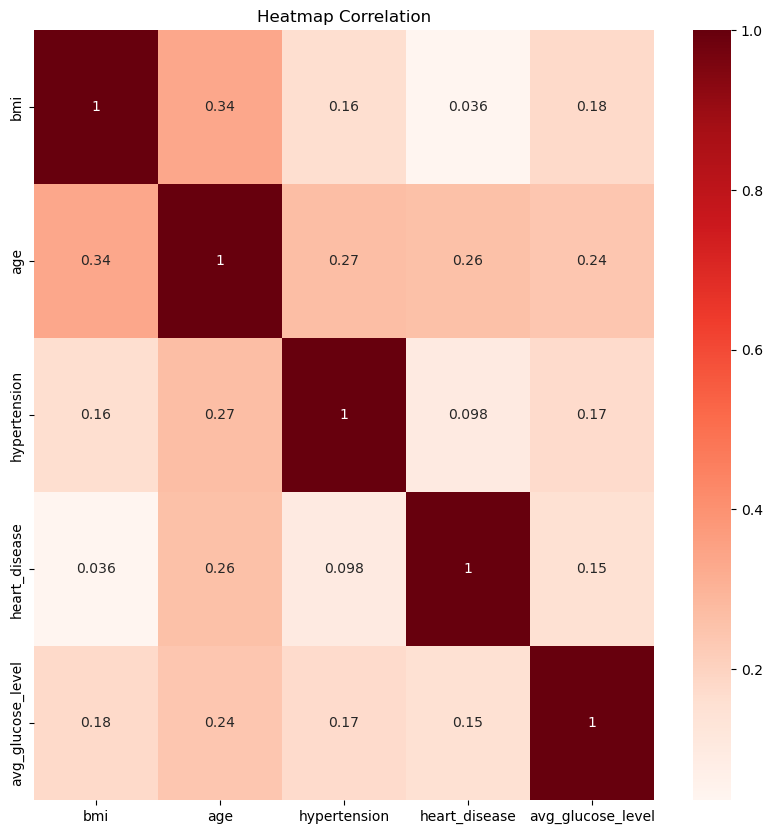

In [125]:
#Heatmap of new_X_train dataframe.

correlation = new_X_train.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cmap = 'Reds', annot = True);
plt.title('Heatmap Correlation')

Keeping with these guidelines of correlation coefficient.

---

In general a correlation coefficient greater than 0.7 is considered "strong."

Between 0.5 and 0.7 is considered "moderate".

Between 0.3 and 0.5 is considered a "low" correlation.

---

There are moderate correlations with the following column features that have a score of at least 0.3 (30%) as their reading:
1. age
2. bmi

The correlation of the entire 'age' with all other columns seems to almost cross the 30% threshold.  Age seems to have about the same correlation with all other features and is expected to have a cumulative importance towards prediction models.

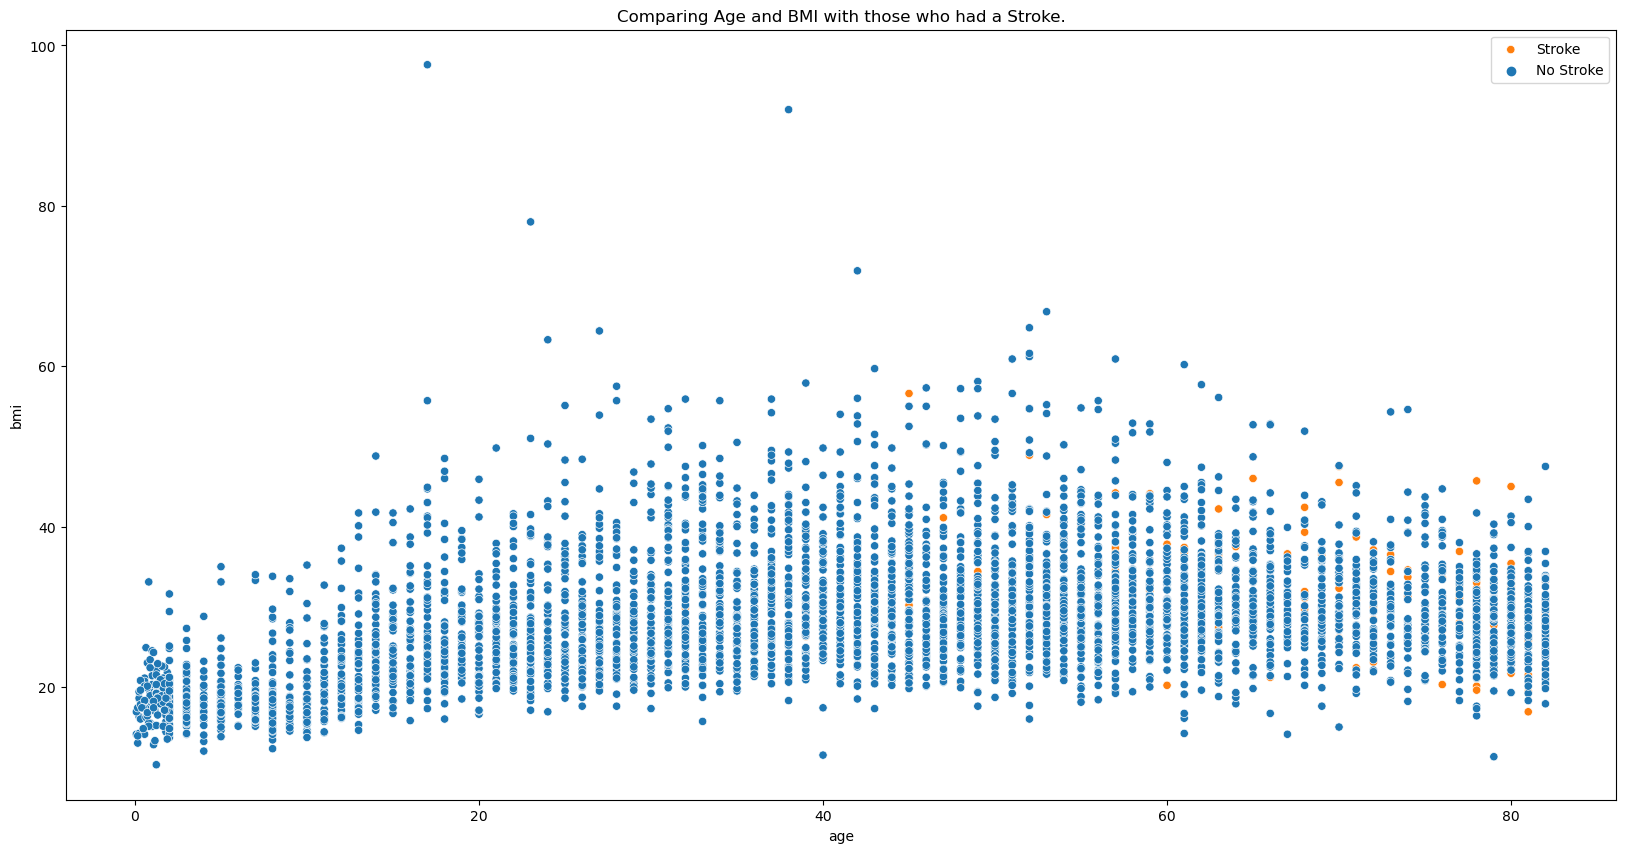

In [126]:
#plt.figure(figsize = (30, 10))
#sns.scatterplot(data=df, x='age', y='bmi',hue='stroke')

plt.figure(figsize = (20,10))

ax = sns.scatterplot(data=df, x='age', y='bmi',hue='stroke')

ax.set(title = 'Comparing Age and BMI with those who had a Stroke.')

ax.legend({"Stroke":0,"No Stroke":1});

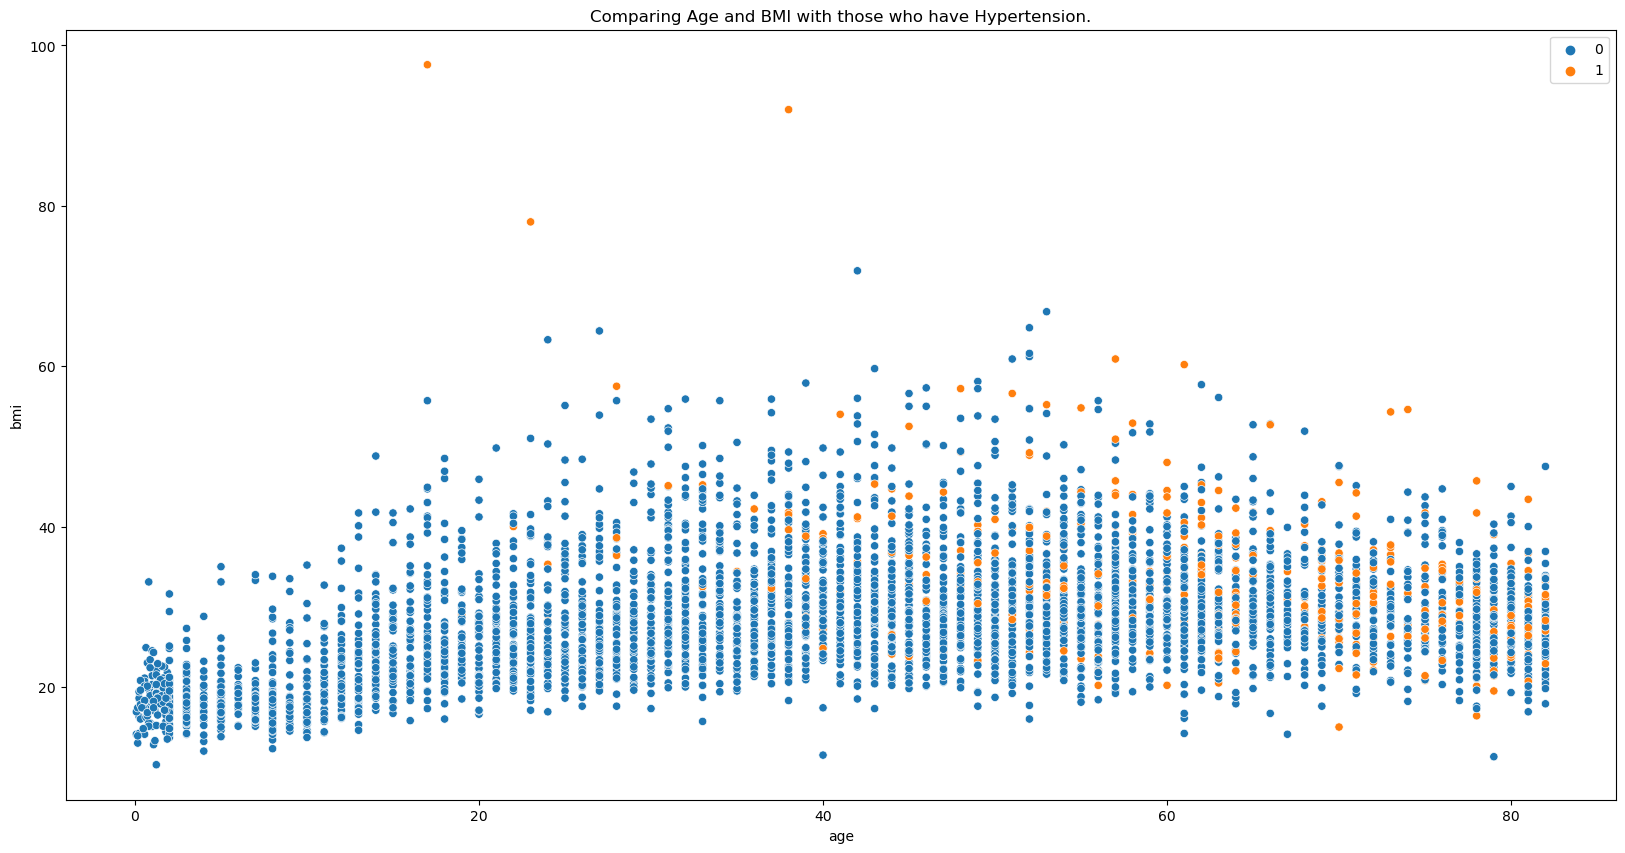

In [127]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(data=df, x='age', y='bmi',hue='hypertension')

ax.set(title = 'Comparing Age and BMI with those who have Hypertension.')

ax.legend();

The above plot showing those with Hypertension may show the one of the leading indicators to those individuals who will eventually have a stroke.  The first instance of stroke recorded (from our previous plot) shows at 50 years old.  Where the first instance of hypertension occurs at 24 years old.

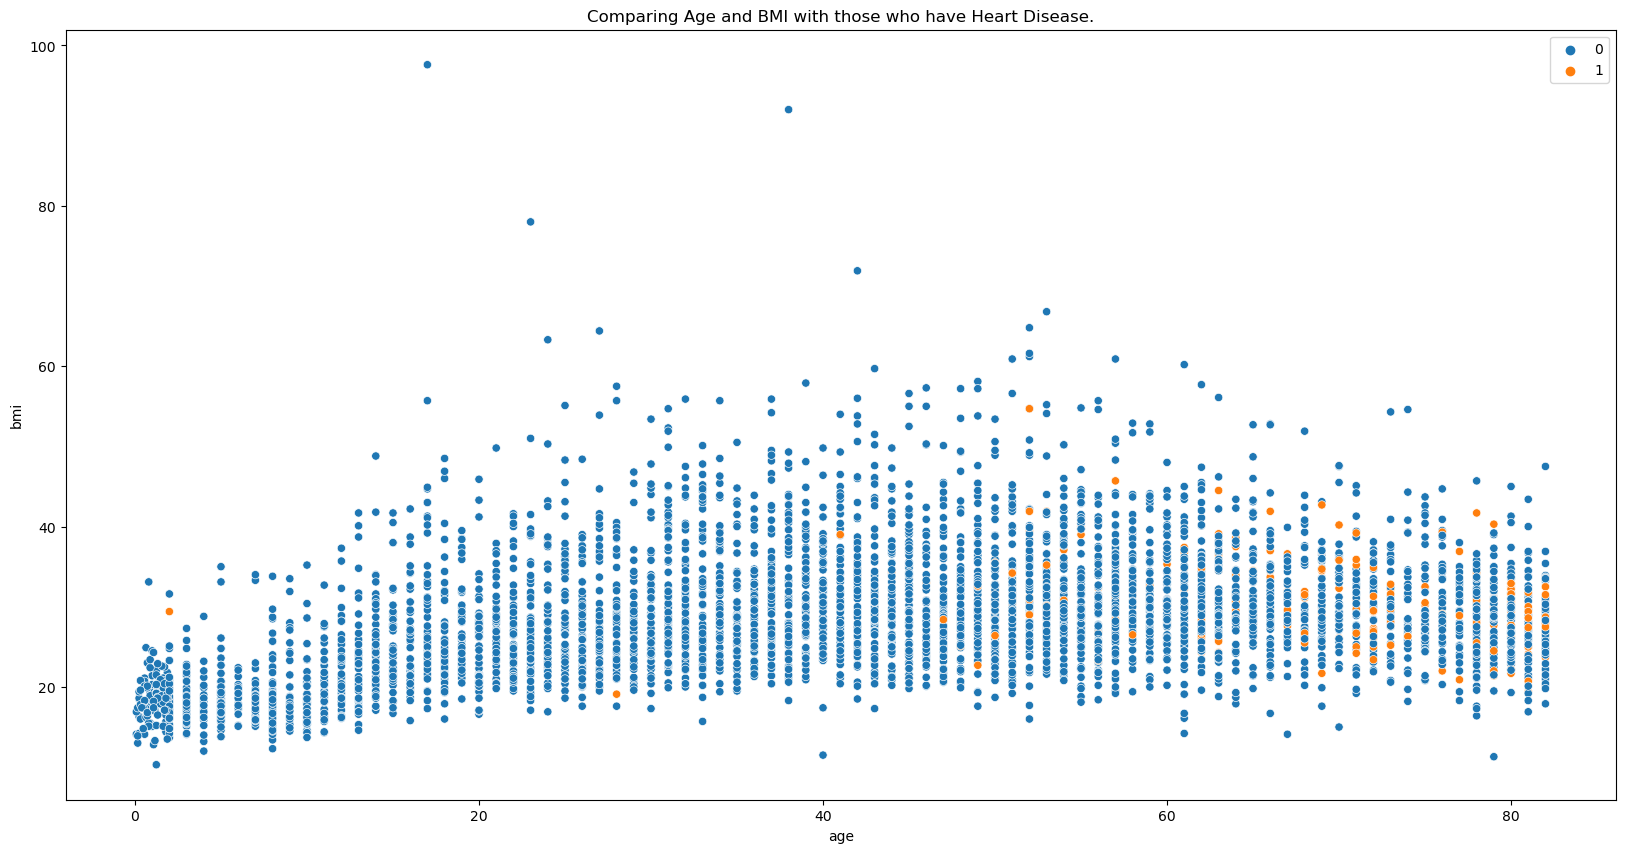

In [128]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(data=df, x='age', y='bmi',hue='heart_disease')

ax.set(title = 'Comparing Age and BMI with those who have Heart Disease.')

ax.legend();

The above graphs show a relation to toward the higher age ranges having more health complications where Heart Disease and Stroke happen more frequently.  Heart disease instances also looks to have a lagging response to the possible indicator of hypertension as heart disease seems to happen in the later years of life.

C:\Users\Rashad\AppData\Local\Temp\ipykernel_13456\414511658.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


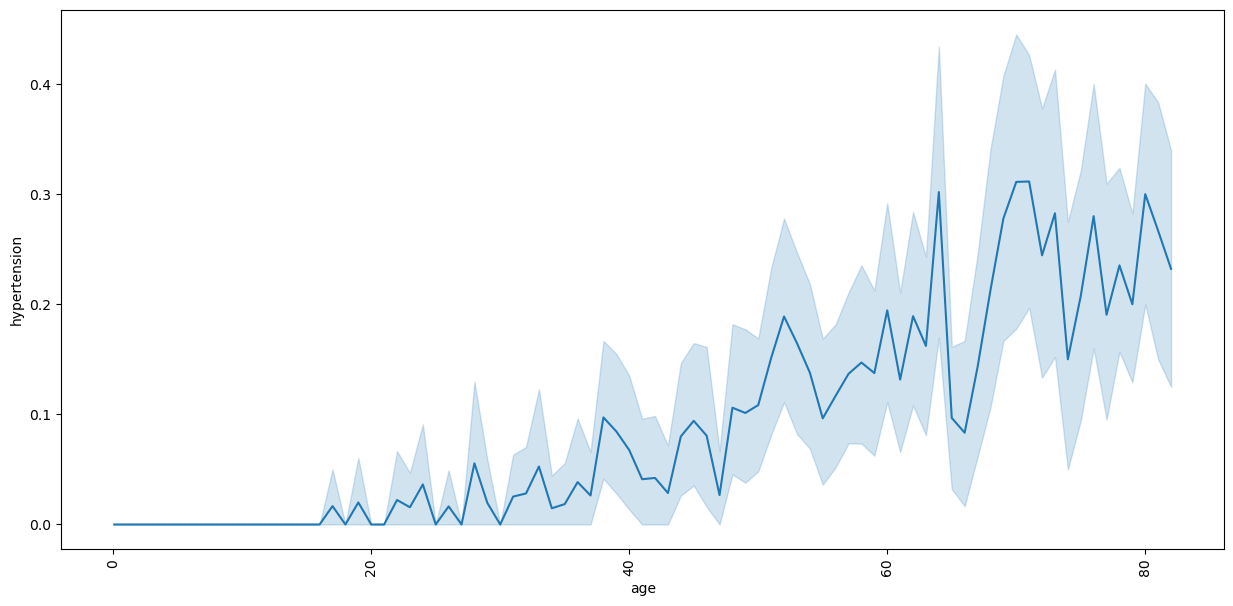

In [129]:
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(data=df, x='age', y='hypertension');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

The above chart shows that occurances of diagnosis of hypertension increase as patients age.

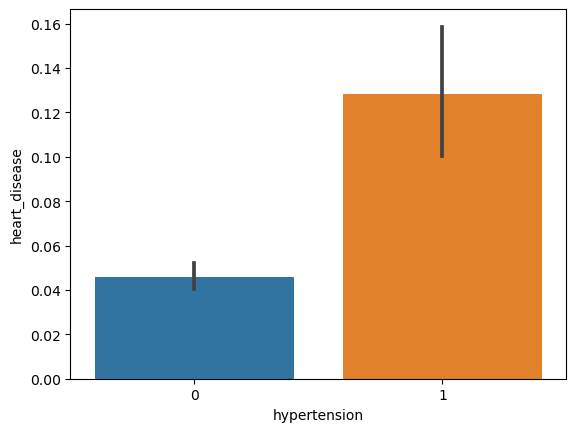

In [130]:
sns.barplot(data=df, x='hypertension', y='heart_disease');

The above barplot shows that those who were diagnosed with hypertension were nearly three times more likely to have heart disease than those who did not have hypertension.

#Modeling - Project2-Part4 CORE
This is a classification problem and I will be making models to predict if the patient will have a stroke.

In [131]:
#quic view of data
display(new_X_train.head(3))
print()
display(new_X_train.info())

,bmi,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status
0,32.200000,Female,81.0,0,0,Yes,Private,Urban,80.44,never smoked
1,28.849211,Male,54.0,1,0,Yes,Private,Rural,198.69,smokes
2,22.100000,Female,39.0,0,0,Yes,Govt_job,Rural,69.38,Unknown



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bmi                3831 non-null   float64
 1   gender             3831 non-null   object 
 2   age                3831 non-null   float64
 3   hypertension       3831 non-null   int64  
 4   heart_disease      3831 non-null   int64  
 5   ever_married       3831 non-null   object 
 6   work_type          3831 non-null   object 
 7   Residence_type     3831 non-null   object 
 8   avg_glucose_level  3831 non-null   float64
 9   smoking_status     3831 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 299.4+ KB


None

##Creating column transfomers and pipelines to prepare dataset for Machine Learning.

In [132]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#instantiate the selectors to form numeric and categorical data types
num_selector = make_column_selector(dtype_include="number")
cat_selector = make_column_selector(dtype_include="object")

#Instantiate Scaler
scaler = StandardScaler()
#Instantiate One-hot encoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1D640>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1DCA0>)])

# BASLINE Logistic Regression Model

In [133]:
from sklearn.linear_model import LogisticRegression

#functions for classification metrics and evaluation
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred, zero_division=0)  #Change 'zero_division' back to 'warn' if needed.
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts");
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True, zero_division=0)  #Change 'zero_division' back to 'warn' if needed.
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data');
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' );
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [134]:
log_reg = LogisticRegression(max_iter=1000, random_state=7)
log_reg_pipe = make_pipeline(preprocessor, log_reg)
log_reg_pipe.fit(new_X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1D640>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1DCA0>)])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=7))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3645
           1       1.00      0.01      0.01       186

    accuracy                           0.95      3831
   macro avg       0.98      0.50      0.49      3831
weighted avg       0.95      0.95      0.93      3831



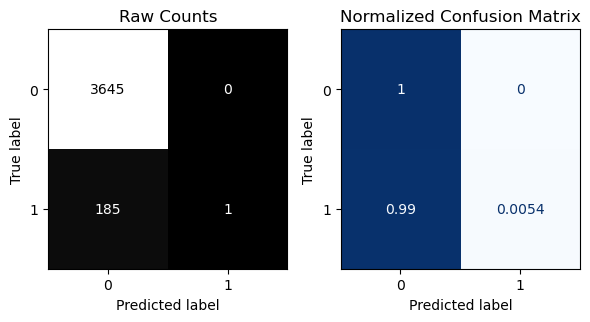


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1215
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.90      0.95      0.93      1278



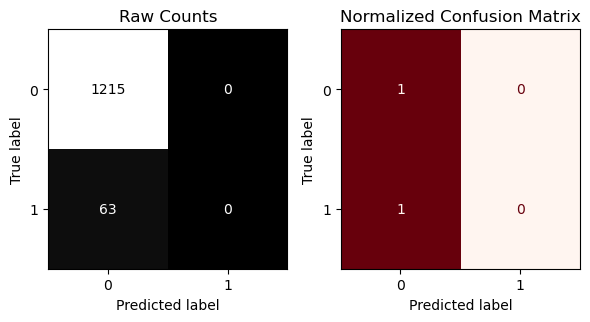

In [135]:
# Evaluate the default model
evaluate_classification(log_reg_pipe, new_X_train, y_train, new_X_test, y_test)

#GRIDSEARCH TUNED Logistic Regression Model

In [136]:
log_reg_pipe.get_params()  #get parameters to hypertune logistic regression model.

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1D640>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1DCA0>)])),
  ('logisticregression', LogisticRegression(max_iter=1000, random_state=7))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1D640>),
                            

In [137]:
# Params compatible with penality='elasticnet'
elasticnet_params = {'logisticregression__solver' : ['saga'],
               'logisticregression__penalty' : ['elasticnet'],
                'logisticregression__l1_ratio': [0, 0.1, 0.2, 0.3, 0.4,
                                                 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
# Params compatible with penality='l2'
l2_params = {'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'sag', 'saga'],
                  'logisticregression__penalty' : ['l2'],
                  'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000] }
# Params compatible with penality='l1'
l1_params = {'logisticregression__solver' : ['liblinear', 'saga'],
               'logisticregression__penalty' : ['l1'],
                'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100, 1000]}
# Params with no penality
none_params = {'logisticregression__solver' : ['lbfgs', 'newton-cg',
                                               'sag', 'saga'],
               'logisticregression__penalty' : ['none']}
# Now make a list of the param dictionaries
param_grid = [l2_params, l1_params, elasticnet_params, none_params]

In [138]:
# Instantiate gridsearch
gs = GridSearchCV(log_reg_pipe, param_grid, n_jobs = -1)
# Fit the gs on the training data only
gs.fit(new_X_train, y_train)
gs.best_params_

{'logisticregression__C': 0.0001,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3645
           1       0.00      0.00      0.00       186

    accuracy                           0.95      3831
   macro avg       0.48      0.50      0.49      3831
weighted avg       0.91      0.95      0.93      3831



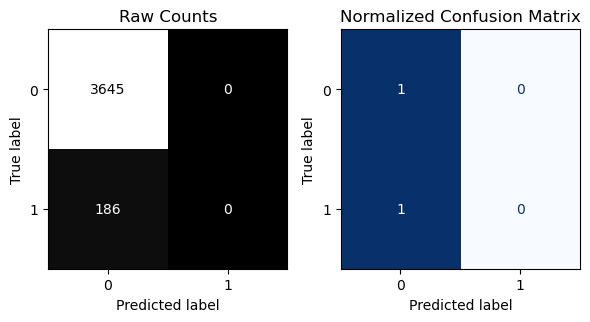


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1215
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.90      0.95      0.93      1278



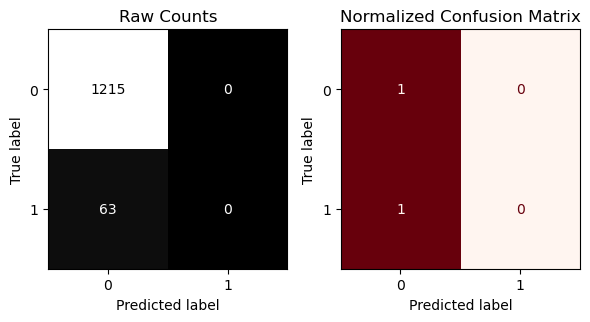

In [139]:
# Evalaute the best model
best_logreg = gs.best_estimator_
evaluate_classification(best_logreg, new_X_train, y_train, new_X_test, y_test)

# BASELINE KNN MODEL

In [140]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate default KNN
knn = KNeighborsClassifier()

knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(new_X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1D640>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1DCA0>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3645
           1       0.58      0.04      0.07       186

    accuracy                           0.95      3831
   macro avg       0.77      0.52      0.52      3831
weighted avg       0.94      0.95      0.93      3831



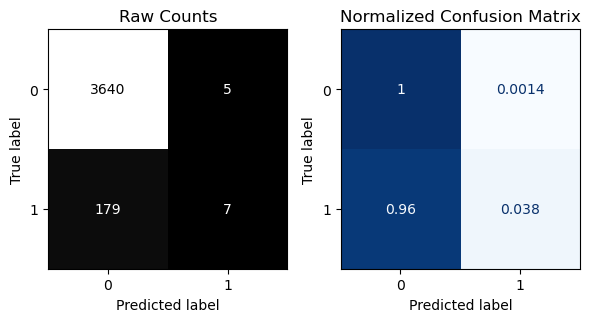


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1215
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



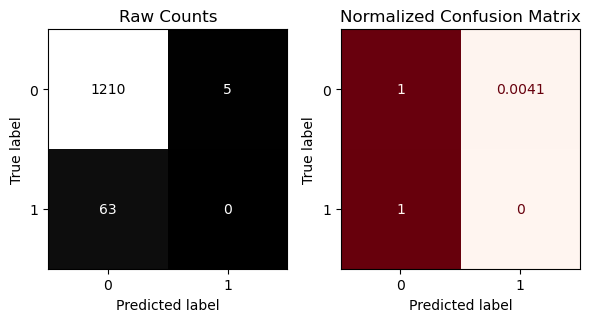

In [141]:
# Evaluate the default model
evaluate_classification(knn_pipe, new_X_train, y_train, new_X_test, y_test)

# GRIDSEARCH TUNED KNN Model

In [142]:
knn_pipe.get_params()  #get parameters to hypertune KNN model.

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1D640>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1DCA0>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF19D1D640>),
                                 ('onehotencoder',
  

In [143]:
# Gridsearch paramaters

# Making every other value from the range (odd values)
nneighbors_list = list(range(1,52,2))

params={'kneighborsclassifier__n_neighbors': nneighbors_list,
        'kneighborsclassifier__algorithm': ['ball_tree','kd_tree'],
        'kneighborsclassifier__leaf_size': list(range(1,51)),
        'kneighborsclassifier__metric': ['minkowski', 'mahalanobis', 'correlation'],
        'kneighborsclassifier__n_jobs': [-1],
        'kneighborsclassifier__p': [1,2],
        'kneighborsclassifier__weights': ['uniform','distance']}

In [ ]:
# Instaniate GridSearchCV
gs = GridSearchCV(knn_pipe, params, n_jobs=-1)

# Fit gs on training data
gs.fit(new_X_train, y_train)

# Obtain best param value for K
gs.best_params_